In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from io import StringIO
import math
import os
plt.close('all')


# LP1472_1F = np.loadtxt("Move_clbr_flat_punch_Lines_30mkmps(True)_1_series/Forward_2021-11-25T18-02-23-LP16-7_Lines_30mkmps(True)_1_series.data.txt",delimiter='\t')
# LP1472_2R = np.loadtxt("Move_clbr_flat_punch_Lines_30mkmps(True)_1_series/Relax_2021-11-25T18-02-23-LP16-7_Lines_30mkmps(True)_1_series.data.txt",delimiter='\t')
# LP1472_3B = np.loadtxt("Move_clbr_flat_punch_Lines_30mkmps(True)_1_series/Backward_2021-11-25T18-02-23-LP16-7_Lines_30mkmps(True)_1_series.data.txt",delimiter='\t')
LP1317_1F = np.loadtxt("Move_clbr_flat_punch_Lines_30mkmps(True)_1_series/Forward_2021-11-25T18-07-51-LP16-7_Lines_30mkmps(True)_1_series.data.txt",delimiter='\t')
LP1317_2R = np.loadtxt("Move_clbr_flat_punch_Lines_30mkmps(True)_1_series/Relax_2021-11-25T18-07-51-LP16-7_Lines_30mkmps(True)_1_series.data.txt",delimiter='\t')
LP1317_3B = np.loadtxt("Move_clbr_flat_punch_Lines_30mkmps(True)_1_series/Backward_2021-11-25T18-07-51-LP16-7_Lines_30mkmps(True)_1_series.data.txt",delimiter='\t')
LP1162_1F = np.loadtxt("Move_clbr_flat_punch_Lines_30mkmps(True)_1_series/Forward_2021-11-25T18-14-13-LP16-7_Lines_30mkmps(True)_1_series.data.txt",delimiter='\t')
LP1162_2R = np.loadtxt("Move_clbr_flat_punch_Lines_30mkmps(True)_1_series/Relax_2021-11-25T18-14-13-LP16-7_Lines_30mkmps(True)_1_series.data.txt",delimiter='\t')
LP1162_3B = np.loadtxt("Move_clbr_flat_punch_Lines_30mkmps(True)_1_series/Backward_2021-11-25T18-14-13-LP16-7_Lines_30mkmps(True)_1_series.data.txt",delimiter='\t')


# LP860_1F = np.loadtxt("Move_clbr_flat_punch_Lines_30mkmps(True)_1_series/Forward_2021-11-25T18-18-01-LP16-7_Lines_30mkmps(True)_1_series.data.txt",delimiter='\t')
# LP860_2R = np.loadtxt("Move_clbr_flat_punch_Lines_30mkmps(True)_1_series/Relax_2021-11-25T18-18-01-LP16-7_Lines_30mkmps(True)_1_series.data.txt",delimiter='\t')
# LP860_3B = np.loadtxt("Move_clbr_flat_punch_Lines_30mkmps(True)_1_series/Backward_2021-11-25T18-18-01-LP16-7_Lines_30mkmps(True)_1_series.data.txt",delimiter='\t')




In [2]:
tmp = %who_ls
i = 0
sample_list_tmp = []
while tmp[i][0] == 'L':
    sample_list_tmp.append(tmp[i])
    i+=1
%whos
sample_list = sample_list_tmp [2::3]
print(sample_list)

f = open('path.txt','r')
path_fig = f.readline().strip()
f.close()

f = open('config_proceed.txt','r')
dS_modale = int(f.readline().strip())
f.close()
sample_list

Variable          Type       Data/Info
--------------------------------------
LP1162_1F         ndarray    9337x2: 18674 elems, type `float64`, 149392 bytes (145.890625 kb)
LP1162_2R         ndarray    926x2: 1852 elems, type `float64`, 14816 bytes
LP1162_3B         ndarray    1973x2: 3946 elems, type `float64`, 31568 bytes
LP1317_1F         ndarray    11398x2: 22796 elems, type `float64`, 182368 bytes (178.09375 kb)
LP1317_2R         ndarray    926x2: 1852 elems, type `float64`, 14816 bytes
LP1317_3B         ndarray    1333x2: 2666 elems, type `float64`, 21328 bytes
StringIO          type       <class '_io.StringIO'>
i                 int        6
math              module     <module 'math' from '/hom<...>-38-x86_64-linux-gnu.so'>
np                module     <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
os                module     <module 'os' from '/home/<...>da3/lib/python3.8/os.py'>
pd                module     <module 'pandas' from '/h<...>ages/pandas/__init__.py'>
plt

['LP1162_3B', 'LP1317_3B']

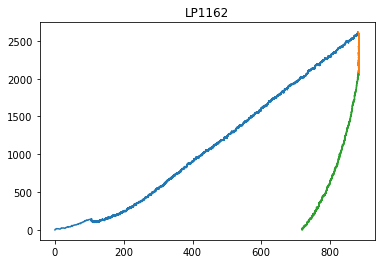

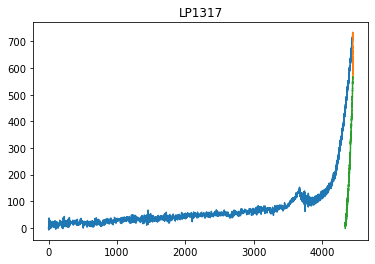

In [3]:
for name in sample_list_tmp:
    np_tmp = globals().get(name)
    if name[-1] !='B':

    #     print(np_tmp[:,0])
        plt.plot(np_tmp[:,0],np_tmp[:,1])
    else:
        plt.plot(np_tmp[:,0],np_tmp[:,1])
        plt.title(name[:-3])
        plt.show()
#plt.legend()


In [4]:
def find_limit(np_tmp):
    down_limit =0
#     up_limit = 0
    count_d = 0
#     count_up = 0
    
    df_limit = 0.3
    step = 30
#     step_dt = 0.2
    i = 1
    len_np_tmp = len(np_tmp)
#    print(len_DF)
#     print('h,nm',(np_tmp[i,0], np_tmp[2,0]),' F,mkmN',(np_tmp[i,1],np_tmp[i+step,1]))
    while i < len_np_tmp/2:
        
        i_new = i + step
    
#         print('h,nm',(np_tmp[i,0], np_tmp[i_new,0]),' F,mkmN',(np_tmp[i,1],np_tmp[i_new,1]))
        
        df_d = (np_tmp[i,1] - np_tmp[i_new,1])/(np_tmp[i,0] - np_tmp[i_new,0])

#         df_up = (np_tmp[-i][1] - np_tmp[-(i_new)][1])/(np_tmp[-i][0] - np_tmp[-(i_new)][0])
        
#         print(df_d,df_up)

        if abs(df_d) < df_limit and count_d < 10:
            down_limit = i
            count_d = 0
        else:
            count_d += 1

#         if abs(df_up) < df_limit and count_up < 10:
#             up_limit = i
#             count_up = 0
#         else:
#             count_up += 1
              
        i+=step
#     up_limit_tmp = -up_limit
    print(down_limit,np_tmp[down_limit,0])
#     counter = 0
    if down_limit != 0:
        for i in range(down_limit):
            np_tmp = np.delete(np_tmp,(0), axis = 0)
#             counter +=1
#     print('I have deleted that %d!'%(counter))
        
    len_np_tmp -= down_limit 
    
#     if up_limit != 0:
#         for i in range(up_limit):
#             np_tmp = np.delete(np_tmp,(-1), axis = 0)
    
    #print(len(DF),down_limit,up_limit)
    
    
    
    
    #len_DF = len(DF)
    #df_limit = 10000
    #down_limit =0
    #up_limit = 0
    #count_up = 0
    #count_d = 0
    #i = 0
    #part = 0.35
    #while i < len_DF*part:
    
        #df_d = (DF[i][3] - DF[i_new][3])/

        #df_up = (DF[-i][3] - DF[-(i_new)][3])/
        
   #     if (DF[i][3] - DF[i_new][3])==0:
             #down_limit = i
     #       count_d = 0
        #elif abs((DF[i][2] - DF[i_new][2])/(DF[i][3] - DF[i_new][3])) > df_limit and count_d < 10:
         #   print((DF[i][2] - DF[i_new][2])/(DF[i][3] - DF[i_new][3]))
          #  down_limit = i
           # count_d = 0
        #else:
         #   count_d += 1

#        if (DF[-i][3] - DF[-(i_new)][3])==0:
#            up_limit = i
#            count_up = 0
#        elif abs((DF[-i][2] - DF[-(i_new)][2])/(DF[-i][3] - DF[-(i_new)][3])) > df_limit and count_up < 10:
#            print((DF[-i][2] - DF[-(i_new)][2])/(DF[i][3] - DF[-(i_new)][3]))
#            up_limit = i
#            count_up = 0
#        else:
#            count_up += 1
              
#        i+=step
    
#    for i in range(down_limit):
#        DF = np_tmp.delete(DF,(0), axis = 0)
        
#    len_DF -= down_limit 
    
#    for i in range(up_limit):
#        DF = np_tmp.delete(DF,(-1), axis = 0)
        
#    print(len(DF),down_limit,up_limit)
#    print(DF.shape)
    return np_tmp

In [5]:
def join_data(frame):
#     print(id(np.empty((1,2))))
    new_np_tmp = np.empty((1,2))
#     print(id(new_np_tmp))
    for name in sample_list_tmp:
        
        np_tmp = globals().get(name)
#         print(name,id(np_tmp))
#         new_np_tmp = np_tmp.copy()
        if name[-1] != 'B':

            new_np_tmp = np.vstack((new_np_tmp,np_tmp))
#             print('new_np_tmp',id(new_np_tmp),len(new_np_tmp))
        #i = 1
        #dlina = len(DF_tmp)
        #while i < dlina:
        #    new_DF_tmp = np.vstack([new_DF_tmp, DF_tmp[]])
#            i+=1000
        
        #new_DF_tmp.rename(columns = {'F,mkmN': name}, inplace = True)
        else:
            new_np_tmp = np.vstack((new_np_tmp,np_tmp))
            frame.append(new_np_tmp)
#             print('new_np_tmp',id(new_np_tmp),len(new_np_tmp))
            new_np_tmp = new_np_tmp[0:0,:]
#         print('new_np_tmp',id(new_np_tmp),new_np_tmp)
            

In [6]:
frame = []

join_data(frame)

0 200.72500000000002
3001 3735.94140625


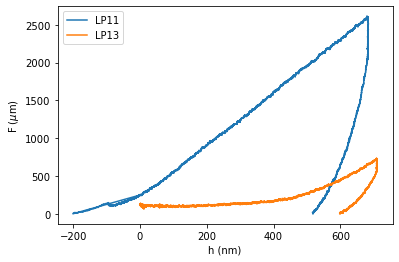

In [7]:
for k in range(len(frame)):
    np_tmp = frame[k]
    #DF_tmp_df = pd.DataFrame(data=DF_tmp, index=np.array(range(len(DF_tmp))),columns=range(5))
    #DF_tmp_df.plot(x=0,y=3)
#     print(np_tmp.shape,id(np_tmp),np_tmp[0,0])
    frame[k] = find_limit(np_tmp)
    min_value = frame[k][0,0]
#     print(min_value)
    frame[k][:,0] = frame[k][:,0] - min_value
    plt.plot(frame[k][:,0],frame[k][:,1],label = sample_list_tmp[3*k][:4])
plt.legend()
plt.ylabel('F ($\mu$m)')
plt.xlabel('h (nm)')
path = os.path.join(path_fig,'F_h_30mkmps_Lines_True_ser_1.pdf')
plt.savefig(path)

plt.show()

In [8]:
%who_ls

['LP1162_1F',
 'LP1162_2R',
 'LP1162_3B',
 'LP1317_1F',
 'LP1317_2R',
 'LP1317_3B',
 'StringIO',
 'dS_modale',
 'f',
 'find_limit',
 'frame',
 'i',
 'join_data',
 'k',
 'math',
 'min_value',
 'name',
 'np',
 'np_tmp',
 'os',
 'path',
 'path_fig',
 'pd',
 'plt',
 'sample_list',
 'sample_list_tmp',
 'sns',
 'tmp']

In [9]:
def reader_of_LP(sample_list):
    list_LP = []
    for name in sample_list:
        len_name = len(name)
        str_list = list(name)
        str_tmp = []
        i = 0
        j = 0
        while name[i] !='P':
            i+=1
        i+=1
        while name[i+j] !="_":
            str_tmp +=str_list[i+j]
            j+=1
            
        tmp = int(''.join(str_tmp))
        if tmp < 30:
            tmp = float(tmp/2)
        else:
            tmp = float(tmp/100/2)
            
        list_LP.append(tmp)
    return list_LP

In [10]:
list_LP = reader_of_LP(sample_list)
list_LP

[5.81, 6.585]

In [11]:
def calc_Er(np_tmp,dS_modale):
    
#     name = sample_list[k]
#     print(np_tmp,name)
#     normirovka(np_tmp,name)
    start = 0
    #print(start,np_tmp['h,nm'][start])
    finish = start
    #print(start,np_tmp['h,nm'][finish+1])
    dS_real = 0 
    #print(start)
    while abs(dS_real) < dS_modale:
        
        finish +=1
        dS_real = np_tmp[finish][0] - np_tmp[start][0]
        #print(dS_real)
    
    NP = np.array([0,0])
    for i in range(start,finish+1):
        #print([np_tmp['h,nm'][i], np_tmp[sample_list[k]][i]])
        NP = np.vstack([NP, np_tmp[i]])
    NP = np.delete(NP,(0),axis = 0)
    #print(np_tmp[:,0])
    plt.plot(NP[:,0], NP[:,1])
    
    x_tmp = np.vstack([NP[:,0], np.ones(len(NP[:,0]))]).T
    #x_tmp = np_tmp[:,0].T
    #print(x_tmp)
    Er, tmp =np.linalg.lstsq(x_tmp,NP[:,1],rcond=None)[0] 

    plt.plot(x_tmp,x_tmp*Er + tmp,'r',label="Fitted line")
#     plt.xlim([2000-dS_modale, 2050])
    plt.ylim([0,20000])
    #Er = (np_tmp[sample_list[k]][finish] - np_tmp[sample_list[k]][start])/(dS_real)
    #np_tmp[start-50:finish].plot(x='h,nm',y=sample_list[k])
    #print(Er)
    return abs(Er)
    
# def find_reload(np_tmp):
    
#     len_np_tmp = len(np_tmp)
#     i = int(len_np_tmp*0.2)
#     step = 1
#     np_tmp_limit = 15
#     count = 0
#     #print(i,np_tmp['h,nm'])
#     np_tmp = int((np_tmp['h,nm'][5+i] - np_tmp['h,nm'][i])/(np_tmp['t,s'][i+5] - np_tmp['t,s'][i]))
#     #print(np_tmp)
#     while i < len_np_tmp :
#         i+=step
#         np_tmp = int((np_tmp['h,nm'][i+5] - np_tmp['h,nm'][i])/(np_tmp['t,s'][i+5] - np_tmp['t,s'][i]))
#         #print(np_tmp,count,i)
#         if np_tmp >= 0 and count < 3:
#             count = 0
#         elif count >= 3 and abs(np_tmp) > np_tmp_limit:
#             #print(i)
#             return i
#         else:
#             count+=1
#         #print(np_tmp)
        
#     #print(i)
#     #print(np_tmp)
#     #np_tmp.plot(x='t,s',y='h,nm')
#     #return i
    
# def normirovka(np_tmp,name):
    
#     j = 0
#     ref_tmp = min(np_tmp[name][:len(np_tmp)-1])
#     while j < len(np_tmp):


#         tmp = np_tmp[name][j]
#         np_tmp[name][j] = tmp - ref_tmp
#         j+=1
    

[0.5662464393915049, 0.21260390552709144]

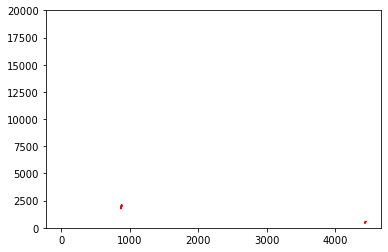

In [12]:
list_Er = []
for name in sample_list:
    np_tmp = globals().get(name)
    df_dh = calc_Er(np_tmp,dS_modale)
    Area = 625 *0.25 * math.pi
    t = 10
    Er = t*df_dh/Area
    list_Er.append(Er)
    #calc_Er(DF_tmp,k)
list_Er

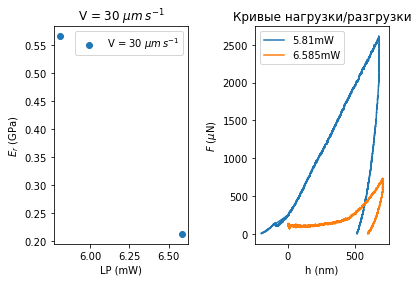

In [13]:
import pylab
Er_LP = np.vstack((list_LP, list_Er))
pylab.subplot(121)
pylab.scatter(Er_LP[0], Er_LP[1], label= 'V = 30 $\mu m \, s^{-1}$')  #  r - значит red
pylab.xlabel('LP (mW)')
pylab.ylabel('$E_r$ (GPa)')
pylab.title('V = 30 $\mu m \, s^{-1}$')
pylab.legend(loc='upper right')
pylab.subplot(122)
for k in range(len(frame)):
    lab = (str(list_LP[k])+'mW')
    pylab.plot(frame[k][:,0], frame[k][:,1], label = lab)
pylab.xlabel('h (nm)')
pylab.ylabel('$F$ ($\mu \mathrm{N}$)')
pylab.title('Кривые нагрузки/разгрузки')
pylab.legend(loc='upper left')
pylab.subplots_adjust(wspace=0.5, hspace=0)
#Er_LP, F_h_180mkmps_Lines = plt.subplots(nrows=1, ncols=2)
#pylab.show()
path = os.path.join(path_fig,'Results_30mkmps_Lines_ser_1.pdf')
pylab.savefig(path)
#pylab.savefig('Results_180mkmps_Lines_ser_1.png',format="png")

In [14]:
print(Er_LP)
np.save("Er_30mkms-1_Lines_ser_1(True)",Er_LP)

[[5.81       6.585     ]
 [0.56624644 0.21260391]]


In [15]:
sample_list

['LP1162_3B', 'LP1317_3B']